In [1]:
!pip install tensorflow
!pip install keras-preprocessing


In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = r'C:\Users\Vahedh\Documents\Datasets\New folder\images\images\train'
TEST_DIR = r'C:\Users\Vahedh\Documents\Datasets\New folder\images\images\validation'


In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
1      C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
2      C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
3      C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
4      C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
...                                                  ...       ...
28805  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
28806  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
28807  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
28808  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
28809  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise

[28810 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
1     C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
2     C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
3     C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
4     C:\Users\Vahedh\Documents\Datasets\New folder\...     angry
...                                                 ...       ...
7061  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
7062  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
7063  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
7064  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise
7065  C:\Users\Vahedh\Documents\Datasets\New folder\...  surprise

[7066 rows x 2 columns]
0       C:\Users\Vahedh\Documents\Datasets\New folder\...
1       C:\Users\Vahedh\Documents\Datasets\New folder\...
2       C:\Users\Vahedh\Documents\Datasets\New folder\...
3       C

In [9]:
from tqdm.notebook import tqdm

In [10]:
from keras_preprocessing.image import load_img
import numpy as np
from tqdm.notebook import tqdm

# Function to extract features
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")  # Correct usage of color_mode
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Assuming 48x48 image size
    return features

In [11]:
# Use extract_features for both train and test sets
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])


  0%|          | 0/28810 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

Train features shape: (28810, 48, 48, 1)
Test features shape: (7066, 48, 48, 1)


In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [33]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [35]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np

# Mapping string labels to integers
label_mapping = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}

# Convert labels to integers
train['label'] = train['label'].map(label_mapping)
test['label'] = test['label'].map(label_mapping)

# Flatten y_train and y_test if necessary and apply to_categorical
y_train = np.array(train['label']).reshape(-1)  # Flatten to ensure 1D labels
y_test = np.array(test['label']).reshape(-1)

# Convert y_train and y_test to categorical (one-hot encoded) format
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Check the shapes
print("y_train shape:", y_train.shape)  # Should be (None, 7)
print("y_test shape:", y_test.shape)    # Should be (None, 7)

# Define the Sequential model
model = Sequential()

# Input layer with shape (48, 48, 1) for grayscale images
model.add(Input(shape=(48, 48, 1)))

# Convolutional and pooling layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten and dense layers
model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer with the correct number of classes (7 in this case)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# After feature extraction, ensure shapes match
train_features = extract_features(train['image'])  # x_train

print("x_train shape after feature extraction:", train_features.shape)
print("y_train shape after one-hot encoding:", y_train.shape)


y_train shape: (28810, 7)
y_test shape: (7066, 7)


  0%|          | 0/28810 [00:00<?, ?it/s]

x_train shape after feature extraction: (28810, 48, 48, 1)
y_train shape after one-hot encoding: (28810, 7)


In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.2329 - loss: 1.8352 - val_accuracy: 0.3061 - val_loss: 1.6970
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 210s 928ms/step - accuracy: 0.3489 - loss: 1.6192 - val_accuracy: 0.4264 - val_loss: 1.4717
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 176s 777ms/step - accuracy: 0.4867 - loss: 1.3374 - val_accuracy: 0.5229 - val_loss: 1.2490
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 791ms/step - accuracy: 0.5420 - loss: 1.2022 - val_accuracy: 0.5457 - val_loss: 1.2120
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 192s 849ms/step - accuracy: 0.5793 - loss: 1.1134 - val_accuracy: 0.5661 - val_loss: 1.1553
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 200s 886ms/step - accuracy: 0.6268 - loss: 0.9960 - val_accuracy: 0.5657 - val_loss: 1.1701
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 222s 983ms/step - accuracy: 0.6580 - loss: 0.9192 - val_accuracy: 0.5737 - val_loss: 1.1526
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 180s 796ms/step - accuracy: 0.6

In [55]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
# Save the model architecture to JSON
model_json = model.to_json()
with open(r"C:\Users\Vahedh\Documents\Datasets\New folder\emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model weights in the correct format
model.save_weights(r"C:\Users\Vahedh\Documents\Datasets\New folder\emotiondetector.weights.h5")
print("Model architecture and weights saved successfully.")



Model architecture and weights saved successfully.


In [57]:
# Check if the file exists before loading
directory = r"C:\Users\Vahedh\Documents\Datasets\New folder"
if 'emotiondetector.json' in os.listdir(directory):
    print("Found emotiondetector.json. Proceeding to load the model.")

    # Load the model from JSON
    json_file = open(r"C:\Users\Vahedh\Documents\Datasets\New folder\emotiondetector.json", "r")
    model_json = json_file.read()
    json_file.close()

    # Recreate the model from JSON
    model = model_from_json(model_json)

    # Load the weights
    model.load_weights(r"C:\Users\Vahedh\Documents\Datasets\New folder\emotiondetector.weights.h5")
    print("Model and weights loaded successfully.")

else:
    print("File emotiondetector.json not found. Please check the path and ensure the file exists.")

# Labels for emotion detection
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']




Found emotiondetector.json. Proceeding to load the model.
Model and weights loaded successfully.


Original image is of 'sad'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Model prediction is: neutral


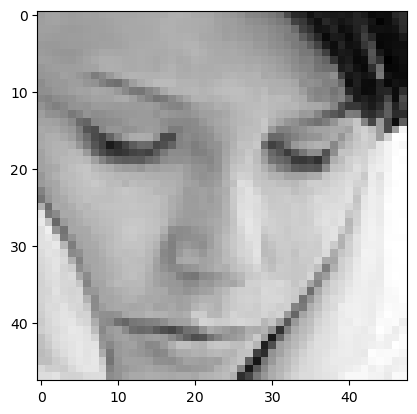

In [59]:
# Function to preprocess the image
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0  # Normalize the image

# Test the model with an image
# Path to your test image
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\sad\42.jpg"  
print("Original image is of 'sad'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'fear'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Model prediction is: fear


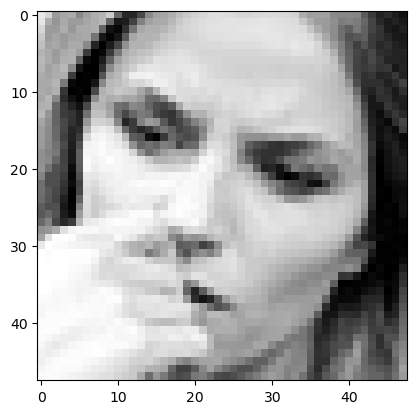

In [61]:
# Test the model with an image 2
# Path to your test image
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\fear\2.jpg"  
print("Original image is of 'fear'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'surprise'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model prediction is: sad


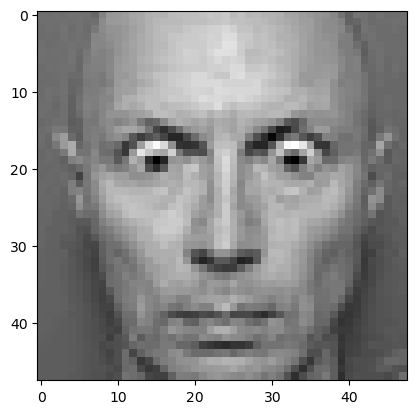

In [44]:
# Test the model with an image 3
# Path to your test image
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\surprise\15.jpg"  
print("Original image is of 'surprise'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'surprise'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction is: disgust


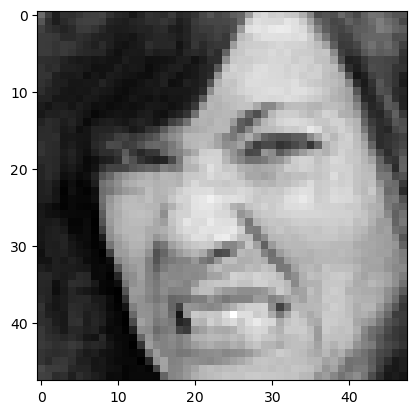

In [65]:
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\disgust\388.jpg"  
print("Original image is of 'disgust'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'angry'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model prediction is: angry


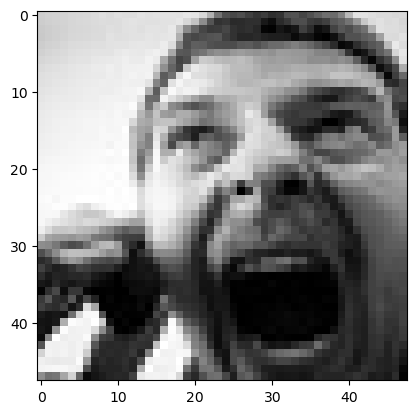

In [67]:
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\angry\43.jpg"  
print("Original image is of 'angry'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'angry'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Model prediction is: angry


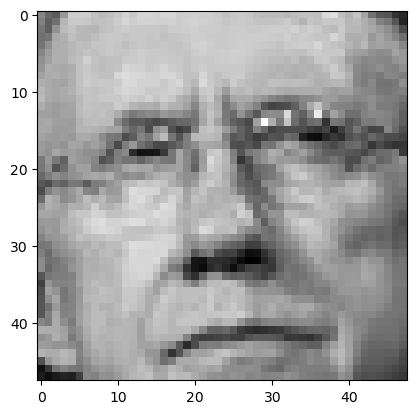

In [71]:
image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\angry\123.jpg"  
print("Original image is of 'angry'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of 'neutral'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model prediction is: surprise


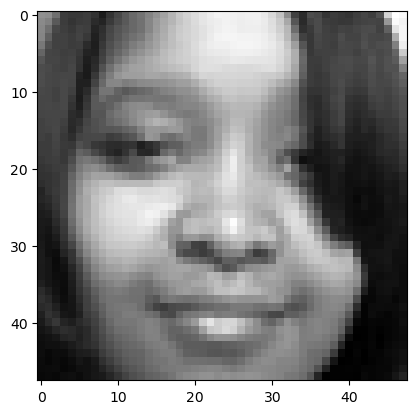

In [91]:
 image = r"C:\Users\Vahedh\Documents\Datasets\New folder\images\train\neutral\206.jpg"  
print("Original image is of 'neutral'")

# Preprocess the image
img = ef(image)

# Predict emotion using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')